# Dia 3: Otimização e Salvamento do Modelo para Produção

## Mas antes, resumo dos dias anteriores!

### Dia 1

In [1]:
import pandas as pd # pandas para manipulação do nosso dataset
import numpy as np  # numpy para conversão, cálculos mais complexos
import matplotlib.pyplot as plt # matplotlib para exibição de gráficos
import seaborn as sns # seaborn também para exibição de gráficos
from sklearn.preprocessing import MinMaxScaler # normalização de variáveis númericas
from sklearn.model_selection import train_test_split # divisão treino e teste

df = pd.read_csv("./data/telco-customer.csv") # lendo o nosso csv e guardando na variável df
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce') # convertendo a coluna TotalCharges para float
df = df.dropna() # excluindo valores nulos / NA (Non Available)
categorical_features = df.select_dtypes(include=['object']).columns.tolist() # guardando todas as features categóricas
features_to_remove = ['customerID', 'Churn'] # colunas que queremos remover = customerID desnecessário, e Churn é o nosso alvo/target
for feature in features_to_remove:
    categorical_features.remove(feature)
df_encoded = pd.get_dummies(df, columns=categorical_features) # usando One hot encoding para transformar variaveis categoricas em numericas
df_encoded['Churn'] = df_encoded['Churn'].map({'No':0, 'Yes':1}) # transformando a variável Churn para valores binários
scaler = MinMaxScaler() # instanciamento da classe, transformando os dados para que os valores fiquem entre [0, 1]
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] # separação das features númericas para normalização
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features]) # calcula o mínimo e o máximo de cada coluna, ficando no intervalo [0, 1]
X = df_encoded.drop(['customerID', 'Churn'], axis=1) # nossas features
y = df_encoded['Churn'] # nosso target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) # divisão treino e teste

### Dia 2

Acurácia: 0.8024164889836531
Precisão: 0.6454545454545455
Recall: 0.56951871657754
F1-Score: 0.6051136363636364
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



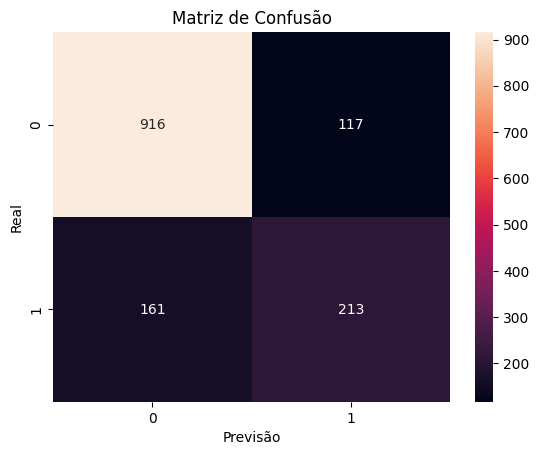

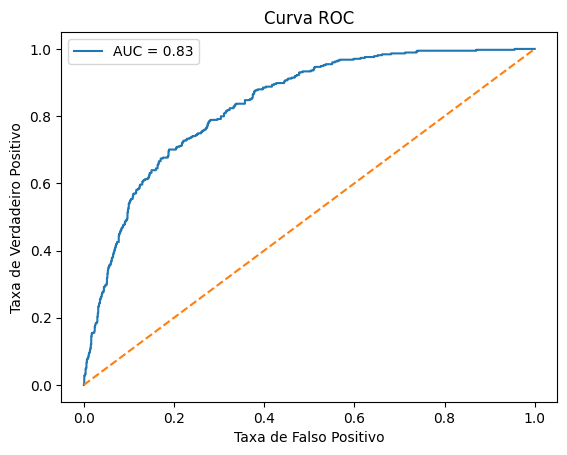

Acurácia média com validação cruzada: 0.80
Acurácia no treino: 0.8046222222222222
Acurácia no teste: 0.8024164889836531
C: 0.01
Acurácia no teste: 0.783226723525231
F1-Score no teste: 0.5371775417298937
C: 0.1
Acurácia no teste: 0.798862828713575
F1-Score no teste: 0.5962910128388017
C: 1
Acurácia no teste: 0.8024164889836531
F1-Score no teste: 0.6051136363636364
C: 10
Acurácia no teste: 0.8031272210376688
F1-Score no teste: 0.6059743954480796
C: 20
Acurácia no teste: 0.8031272210376688
F1-Score no teste: 0.6070921985815603


In [2]:
from sklearn.linear_model import LogisticRegression # importação do modelo de Regressão Logística
# importação das métricas de avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix # importação da matriz de confusão
from sklearn.metrics import roc_curve, roc_auc_score # importando curva ROC 
from sklearn.model_selection import cross_val_score # Validação Cruzada
model = LogisticRegression(max_iter=1000) # Inicializando o modelo
model.fit(X_train, y_train) # Treinando o modelo
y_pred = model.predict(X_test) # Previsões no conjunto de teste
# Calculando as métricas
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred)) # Relatório de classificação
conf_matrix = confusion_matrix(y_test, y_pred) # gerando a matriz de confusão (o array)
sns.heatmap(conf_matrix, annot=True, fmt='d') # criando um mapa de calor com a matriz de confusão
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show() # plotando a matriz
y_prob = model.predict_proba(X_test)[:,1] # Probabilidades de previsão
fpr, tpr, thresholds = roc_curve(y_test, y_prob) # Calculando a curva ROC 
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc)) # Plotando a curva ROC
plt.plot([0,1], [0,1], linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend()
plt.show()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy') # Avaliando o modelo com validação cruzada
print("Acurácia média com validação cruzada: {:.2f}".format(cv_scores.mean()))
train_pred = model.predict(X_train) # análise de overfitting e underfitting
print("Acurácia no treino:", accuracy_score(y_train, train_pred))
print("Acurácia no teste:", accuracy_score(y_test, y_pred))

# Tuning básico de hiperparâmetros
# Tentando diferentes valores para 'C' na regressão logística
for c in [0.01, 0.1, 1, 10, 20]:
    model = LogisticRegression(C=c, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("C:", c)
    print("Acurácia no teste:", accuracy_score(y_test, y_pred))
    print("F1-Score no teste:", f1_score(y_test, y_pred))

# Dia 3: Otimização e Salvamento do Modelo para Produção

## Otimização de Hiperparâmetros

### Usando Grid Search

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C':[10, 11, 12, 13, 14, 15, 16],
    'solver': ['liblinear', 'lbfgs']
}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor score:", grid.best_score_)

Melhores parâmetros: {'C': 14, 'solver': 'lbfgs'}
Melhor score: 0.5972052676618085
